# EDA and Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv(r"C:\Users\nisha\Downloads\archive (7)\housing.csv")
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


The column total bedrooms has around 200 missing values. Dropping the missing values as it has sufficient data even after dropping.

In [4]:
# dropping the missing values and checking it again
housing.dropna(inplace = True)
housing.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [5]:
# creating dummy values
dummies =pd.get_dummies(housing['ocean_proximity'])
housing = housing.join(dummies)
housing['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
# drop the categorical variable and one of the dummies
housing.drop(columns = ['ocean_proximity','NEAR BAY'],axis=1, inplace = True)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

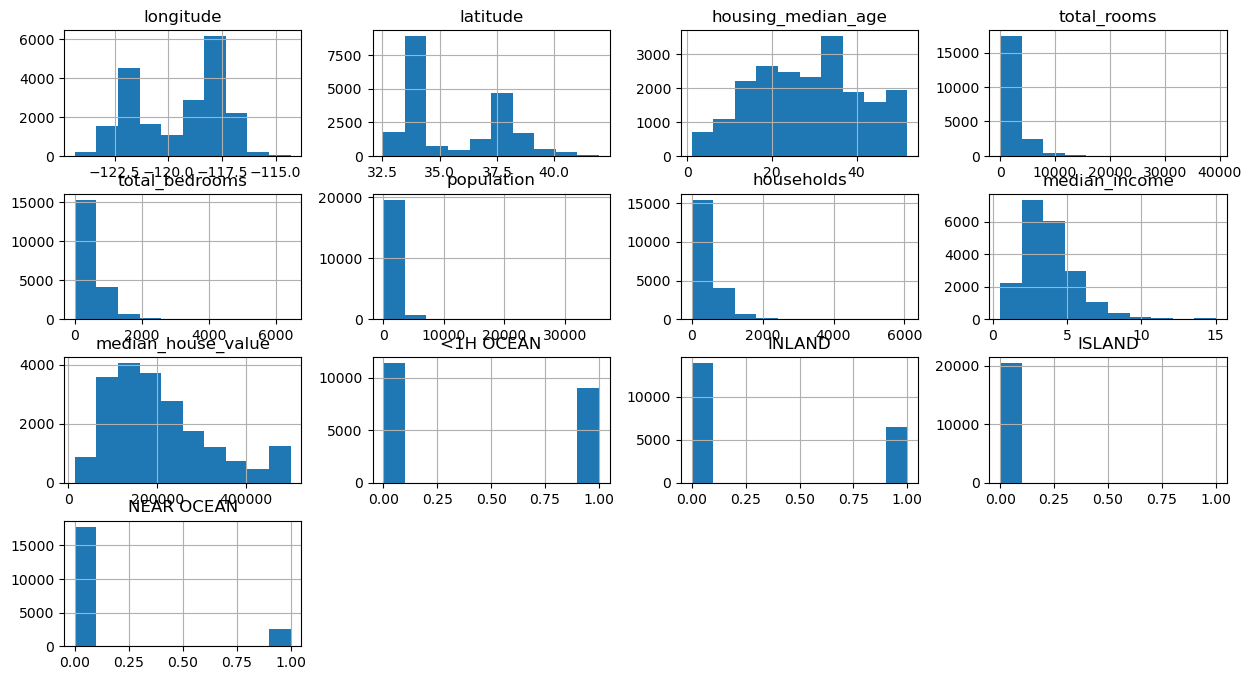

In [7]:
# check the distribution of the variables
housing.hist(figsize = (15,8))

From the histograms, it can be seen that the variables total_rooms, total_bedrooms, population, households are skewed.

<Axes: >

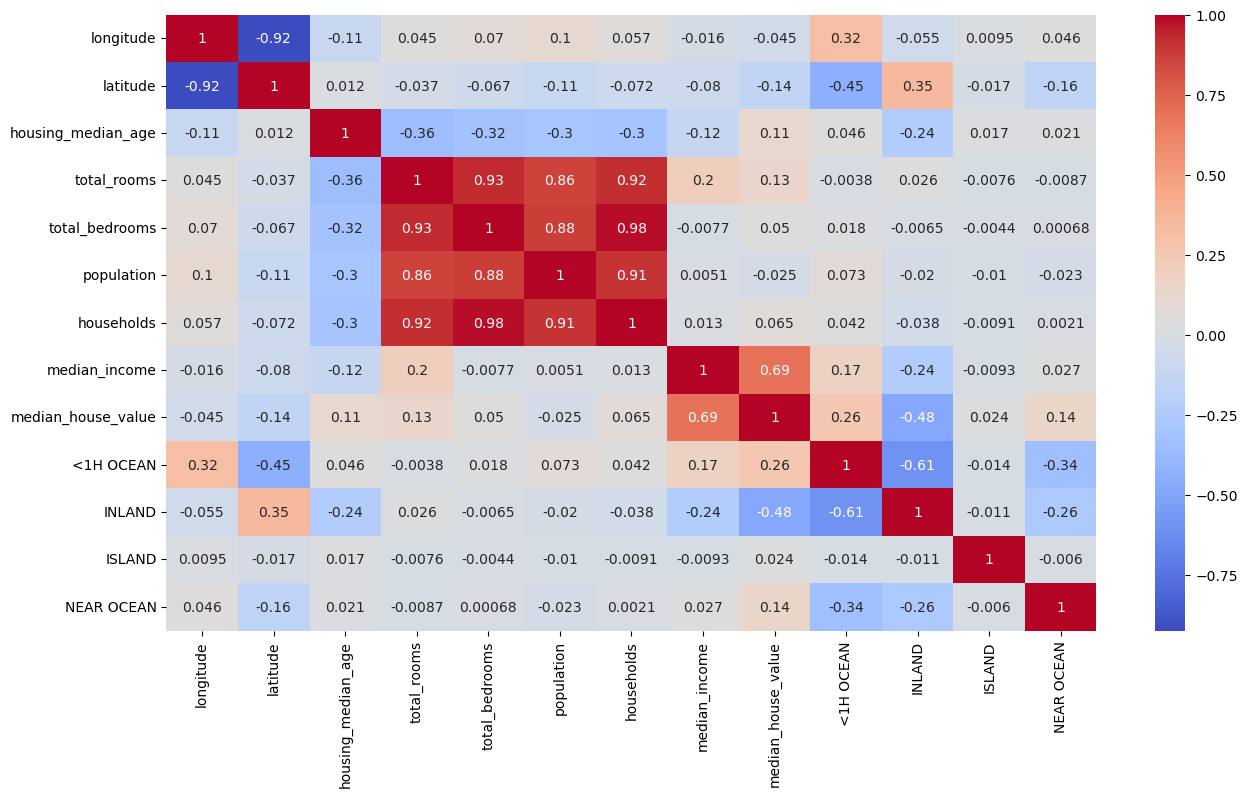

In [8]:
# check the correlation between the variables
plt.figure(figsize = (15,8))
sns.heatmap(housing.corr(), annot = True,cmap = 'coolwarm')

In [9]:
# convert those skewed variables into logs of those variables
housing['total_rooms'] = np.log(housing['total_rooms']) +1 
housing['total_bedrooms'] = np.log(housing['total_bedrooms']) +1 
housing['population'] = np.log(housing['population']) +1 
housing['households'] = np.log(housing['households']) +1 

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': 'median_house_value'}>,
        <Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

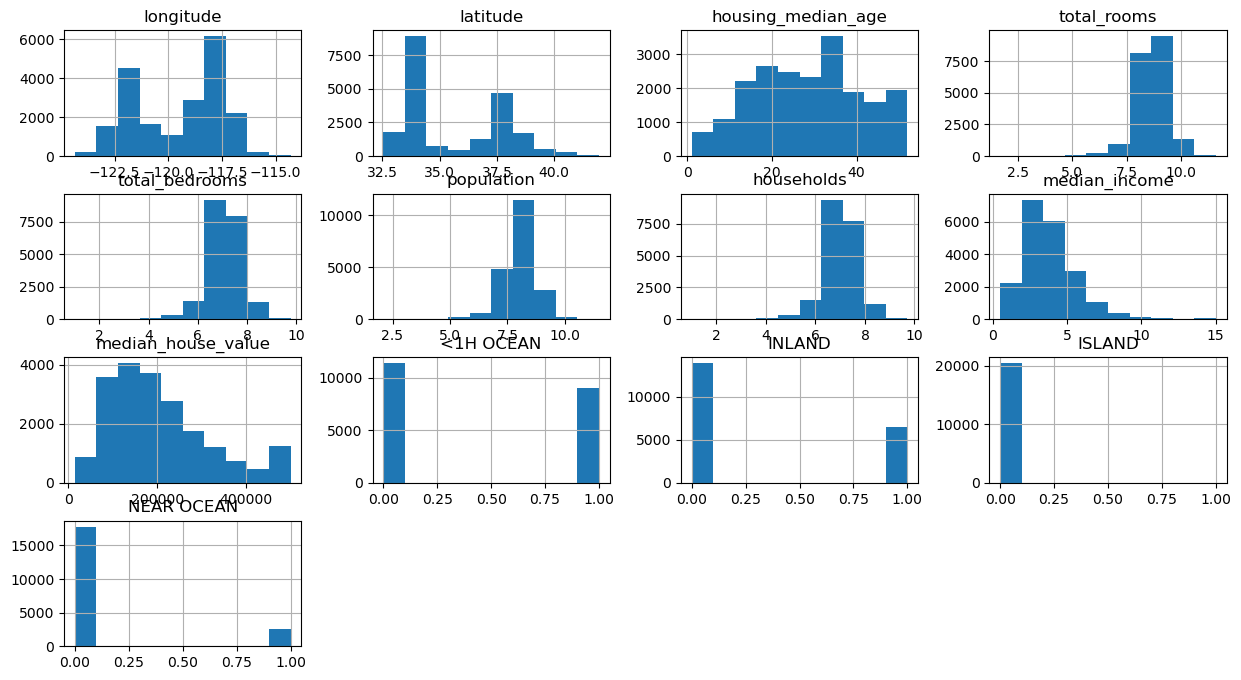

In [10]:
# check the distribution again after converting into log
housing.hist(figsize = (15,8))

As the number of rooms and the number of bedrooms depend on the size of the neighborhood block, we create new variables with the ratio of the number of rooms and the number of households, the number of bedrooms and number of household in the block.

In [11]:
# feature engineering
housing['bedroom_ratio'] = housing['total_bedrooms'] / housing['total_rooms']
housing['bedroom_avg'] = housing['total_bedrooms'] / housing['households']
housing['room_avg'] = housing['total_rooms'] / housing['households']

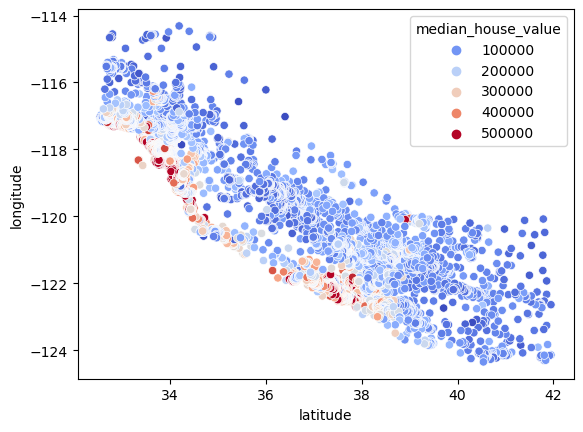

In [12]:
sns.scatterplot(x=housing['latitude'], y=housing['longitude'], hue = housing['median_house_value'],palette = 'coolwarm')
plt.show()

The above scatter plot shows that the neighborhoods close to the ocean cost more.

From the correlation matrix, we can see that the total rooms and the total bedrooms are very highly correlated with each other. Population is also highly correlated with the discussed. So we remove total_rooms and total_bedrooms from the model and decide to use the room ratio and the bedroom ratio instead.

In [13]:
housing.drop(columns = ['total_rooms','total_bedrooms'],axis =1, inplace = True)

The processed data is as follows:

In [14]:
print(housing)

       longitude  latitude  housing_median_age  population  households  \
0        -122.23     37.88                41.0    6.774552    5.836282   
1        -122.22     37.86                21.0    8.783641    8.037028   
2        -122.24     37.85                52.0    7.206576    6.176150   
3        -122.25     37.85                52.0    7.324359    6.389072   
4        -122.25     37.85                52.0    7.336826    6.556828   
...          ...       ...                 ...         ...         ...   
20635    -121.09     39.48                25.0    7.739337    6.799093   
20636    -121.21     39.49                18.0    6.874931    5.736198   
20637    -121.22     39.43                17.0    7.914731    7.070738   
20638    -121.32     39.43                18.0    7.608001    6.855072   
20639    -121.24     39.37                16.0    8.234898    7.272877   

       median_income  median_house_value  <1H OCEAN  INLAND  ISLAND  \
0             8.3252            452600.0

In [15]:
# splitting the dependent and independent variables 
y = housing['median_house_value']
x = housing.drop(columns = ['median_house_value'],axis =1)

In [16]:
# split the data into training set and testing set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2, random_state = 109)

In [17]:
# normalize the variables 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

# Model Building and Evaluation

Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(xtrain, ytrain)
predictions = reg.predict(xtest)
print("The score for the model is:", reg.score(xtest,ytest))
print(reg.intercept_)
print(reg.coef_)

The score for the model is: 0.6405418231964444
206712.69276887242
[-56029.56689622 -58400.87189728  13337.12402102 -67444.98852762
  65640.22192422  78641.11607277   3744.72107357 -12276.17565002
   2623.23437347   2300.35840724  63051.06333032 -36459.76928917
  62756.99330857]


The above linear regression model explains only 64.27% of the total variation in the mean houcing price of the block. Let's try other approaches.

Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(xtrain, ytrain)
print(forest.score(xtest, ytest))

0.8155316806557055


The above random forest regression model explains about 76.59% of the total variation in the mean houcing price of the block.

The score is improved, but let us find the optimal parameters.

In [20]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
params = {'n_estimators': [100,200,300], 'min_samples_split':[2,4,6]}
search = GridSearchCV(forest, params, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [21]:
print(search.best_estimator_)
print(search.best_estimator_.score(xtest, ytest))

RandomForestRegressor(min_samples_split=4, n_estimators=300)
0.8163703246464378


The above random forest regression model explains about 81.63% of the total variation in the mean houcing price of the block.